

# 泊松过程

## 生成函数

### 生成函数定义

> 假设 $\xi$ 是**非负整数值**随机变量，分布律为
>$$ P(\xi = k) = p_k, k=0,1,\cdots,$$
>定义
>$$\phi(s) = Es^{\xi} = \sum_{i = 1}^{n} p_k s^k, 0 \leq s \leq 1,$$
>称$\phi(\cdot)$为随机变量$\xi$的生成函数或母函数。

注：
+ 特征函数和生成函数都与一个非负整数值随机变量$\xi$唯一确定。
+ 生成函数唯一确定各阶矩。

在广义实数系下：

+ $E\xi = \phi'(1)$
+ $E\xi(\xi - 1)\cdots(\xi -（k-1）) = \phi^{(k)}(1)$

定理：如果$X$和$Y$都是非负整数值随机变量，那么当$X$与$Y$独立时，对$0 \leq s \leq 1$都有：
$$\phi_{X+Y}(s) = \phi_{X}(s)\phi_{Y}(s)$$


> Poisson分布 
> $P\{ X= k\} = e^{- \lambda} \frac{\lambda ^k}{k!}$


> Poisson分布的生成函数
> $g(t) = E(s^{\xi})= e^{\lambda(s-1)}$


>Poisson分布满足可加性和可分性
>+ 设$X ~ \pi(\lambda), Y ~ \pi(\mu)$，且相互独立，则$X+Y = \pi(\lambda + \mu)$
>+ 设$N ~ \pi(\lambda)$, 在$N = n$的条件下，这n个事件独立的以概率$p_i$为类型i，这里$i = 1,2,\cdots,k,p_1+\cdots+p_k = 1$，以$N_i$表示时间i发生的个数，那么$N_i \sim \pi(\lambda p_i)$，且$N_i$相互独立。 

 

## 泊松过程

### 定义
以$N(t)$表示时间在间隔$(0,t]$内发生的时间的数目，$\{N(t), t\ge 0\}$是非负整数，时间连续的随机过程，称为记数过程；

记数过程$\{N(t)\}$称作参数为$\lambda$的泊松过程，当且仅当：

1. $N(0) = 0$
2. 独立增量
3. （稀有性）$P\{N(t+h) - N(t) = 1\} = \lambda h +o(h)$
4. （相继性）$P\{N(t+h) - N(t) \ge 2\} = o(h)$

泊松过程是一个平稳独立增量过程。


<function matplotlib.pyplot.show(close=None, block=None)>

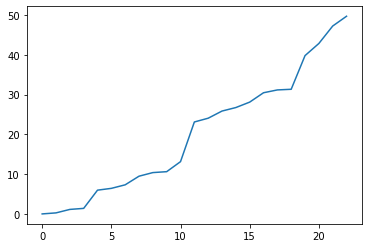

In [2]:
# 应用py随机过程包_泊松过程
from stochastic.processes.continuous import PoissonProcess
import matplotlib.pyplot as plt

ps = PoissonProcess(0.5)
s = ps.sample(22)
plt.plot(s)
plt.show



### 性质
1. $E[N(t)] = D[N(t)] = \lambda t$
2. $C_N(s,t) = \lambda min(s,t)$
3. 对任何$s \ge 0$，$\{N(t+s)-N(s), t\ge 0\}$也是参数为$\lambda$的泊松过程且与$\{N(u): u \leq s\}$独立。
4. 对于$t \ge s, m \ge n$：
- $P\{N_t = n|N_s =m \} = e^{-\lambda (t-s)} \frac{{\lambda(t-s)}^{n-m}}{(n-m)!}$
- $P\{N_t = m|N_s =n \} = {n \choose m}(\frac{s}{t})^m {(1- \frac{s}{t})^{n-m}}$



### 与泊松分布相关的若干分布
1. $S_n$是第n个时间发生的时刻,那么$S_n \sim \Gamma(n, \lambda)$

$$
F_{S_n}(t) = P(S_n \leq t) = P(N(t) \ge n) = 1 - \sum_{i = 0}^{n-1} e^{-\lambda t} \frac{{\lambda t}^i}{i!}
$$

$$

$$


2. 记$T_i = S_i -S_{i-1} ；i = 1,2,\cdots$，称为第i-1个事件和第i个事件发生的时间间隔
>1. $T_i = S_i -S_{i-1}$
>2. $S_0 = 0, S_n = \sum_{i=1}^{n} T_i$
>3. $S_n = inf\{t > 0: N(t) = n\}, n \ge 1$
>4. $N(t) = sup\{n \ge 0: S_n \leq t\}$

**定理**：$\{N(t)\}$是参数为$\lambda$的泊松过程当且仅当其时间间隔$T_i$独立同分布，且服从均值为$\frac{1}{\lambda}$的指数分布。

### 泊松过程的合成和分解
+ 定理（合成）：设$\{N_1(t)\}$和$\{N_2(t)\}$是强度为$\lambda_1$和$\lambda_2$的泊松过程，且相互独立，则$\{N_1(t)+N_2(t)\}$是强度为$\lambda_1 + \lambda_2$的泊松过程
+ 定理（分解）：设$\{N(t)\}$是强度为$\lambda$的泊松过程，若每个事件独立的以概率p为类型1，以1-p为类型2，令$\{N_1(t)\}$和$\{N_2(t)\}$分别表示到t为止类型1和类型2发生的个数，则$\{N_1(t)\}$和$\{N_2(t)\}$分别是为$\lambda p$和$\lambda (1-p)$的泊松过程，且相互独立。


### 到达时刻的条件分布
#### 次序统计量的密度函数

设$X_1,X_2,\cdots,X_n$是来自密度函数为$f$的总体的简单样本。把$X_1,X_2,\cdots,X_n$按从大到小的顺序排列得到$X_{(1)}\leq X_{(2)}\leq \cdots \leq X_{(n)}$则$（X_{(1)},X_{(2)},\cdots,X_{(n)} ）$具有密度函数

$$
g = 
\begin{cases}
{n!f(x_1)f(x_2) \cdots f(x_n)} &  {x_1 \leq x_2 \leq \cdots \leq x_n} \\
0 & others
\end{cases}
$$

#### 定理
> 设${N(t)}$是强度为$\lambda$的泊松过程，令$S_1, \cdots,S_n$分别为第i个事件。
> 对于任意给定的$t>0$和正整数n，$$(S_1,\cdots,S_n|N(t) = n) = (U_{(1)}, \cdots, U_{(n)})$$
> 其中$ U_{(1)}, \cdots, U_{(n)}$为n个独立同$U(0,t)$分布的随机变量的次序统计量

#### 推论
> 可以推广到时间段$t-s$上，即服从$U(s,t)$的分布。







### 复合泊松过程

#### 定义
随机过程$\{X(t): t\ge 0 \}$成为复合随机过程，如果它可以表示为：
$$
X(t) = \sum _{k =1}^{N(t)} Y_k
$$
其中$\{N(t);t \ge 0\}$是速率为$\lambda$的泊松过程，$\{Y_k;k \ge 1\}$是独立于$\{N(t);t \ge 0\}$的一组独立同分布随机变量。

#### 性质

1. $E(X(t)) = \lambda t E(Y_1)$
2. $Var(X(t)) = \lambda t E({Y_1}^2)$
3. $X(0) = 0$且$\{X(t)\}$是平稳独立增量过程

### 非齐次泊松过程

#### 定义
计数过程$\{N(t)\}$称作强度为$\lambda(t)$的非齐次泊松过程，如果：
1. $N(0) = 0$
2. 独立增量
3. $P\{N(t+h) - N(t) = 1\}= \lambda(t)h +o(h)$
4. $P\{N(t+h) - N(t) \ge 2\} = o(h)$

#### 定理

计数过程$\{N(t), t \ge 0\}$是强度为$\lambda(t)$的非齐次泊松过程，当且仅当：
1. $N(0)= 0$
2. 独立增量
3. 对任意的$t>s\ge 0, N(t)-N(s) \sim \pi(\int_{s}^{t} \lambda(u)du)$

**令$m(t) = \int _{0}^{t} \lambda(u) du$, 则$N(t) \sim \pi(m(t))$, $m(t)$是$\{m(t)\}$是$\{N(t)\}$的均值函数**

#### 定理(合成)
设$\{N_1(t)\}$和$\{N_2(t)\}$是强度为${\lambda}_1(t) $和${\lambda}_2(t))$的泊松过程，且相互独立，则$\{N_1(t)+N_2(t)\}$是$\lambda_1(t) +\lambda_2(t)$的泊松过程

#### 定理（分解）

设$N(t)$是强度为$\lambda$的泊松过程，在t时刻发生的事件独立地以概率p（t）为类型一，以1-p（t）为类型二。则$N_1(t)$和$N_2(t)$分别是强度为$\lambda p(t)$和$\lambda(1-p(t))$的泊松过程，且相互独立（此处表示各类型事件发生的个数）。

#### 定理

设$N(t)$是强度为$\lambda(t)$的泊松过程，对于任何的$T>0$，在$N(t)=n$的条件下，每个事件发生的时刻$(X_{(1)}, \cdots, X_{(n)})$(次序统计量)独立同分布，$X_n$
具有概率密度
$\frac{{\lambda(x) 1}_{\{0<x\leq T\}}}{\int_{0}^{T}\lambda (u)du}$